In [1]:
from aqua.diagnostics import sshVariabilityCompute, sshVariabilityPlot

/work/ab0995/a270260/aqua/lib/python3.12/site-packages/intake_esm/__init__.py:6: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound, get_distribution


In [2]:
dataset_dict = {"catalog": "climatedt-phase1", "model": "IFS-NEMO", "exp":"historical-1990", "source":"ssh-IFS-NEMO-test", "regrid":"r025"}
dataset_dict_ref = {"catalog": "obs", "model": "AVISO", "exp":"ssh-L4", "source":"ssh-AVISO-test", "regrid":"r025"}

In [3]:
startdate="1994-01-01";enddate="1994-01-04"; startdate_ref="1994-01-01"; enddate_ref="1994-01-04";

In [4]:
ssh_dataset = sshVariabilityCompute(
                    **dataset_dict,
                    var='zos',
                    startdate=startdate,
                    enddate=enddate,)

In [6]:
ssh_dataset.run()

2025-10-08 18:04:17 :: Regridder :: WARNING  -> Source grid path not found. Please provide a dataset.
2025-10-08 18:04:17 :: Reader :: WARNING  -> Issues in the Regridder() init: trying with data
/work/ab0995/a270260/aqua/lib/python3.12/site-packages/dask/array/numpy_compat.py:57: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


In [7]:
ssh_dataset_ref = sshVariabilityCompute(
                    **dataset_dict_ref,
                    var='zos',
                    startdate=startdate,
                    enddate=enddate,)

In [8]:
ssh_dataset_ref.run()

2025-10-08 18:04:35 :: Regridder :: WARNING  -> Source grid path not found. Please provide a dataset.
2025-10-08 18:04:35 :: Reader :: WARNING  -> Issues in the Regridder() init: trying with data
/work/ab0995/a270260/aqua/lib/python3.12/site-packages/dask/array/numpy_compat.py:57: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


In [9]:
plot_class = sshVariabilityPlot()
sub_region_dataset = {"catalog": "climatedt-phase1", "model": "IFS-NEMO", "exp":"historical-1990", 'region': 'Agulhas', 'lon_limits': [5, 50], 'lat_limits': [-10, -50], 'proj': 'plate_carree', 'proj_params': {}}

2025-10-08 18:04:41 :: PlotSshvariability :: ERROR    -> Please specify the time period of the data


(<Figure size 1100x850 with 2 Axes>,
 <GeoAxes: title={'center': 'SSH Variability of Sea surface height for IFS-NEMO historical-1990 (None to None) Agulhas '}, xlabel='Longitude', ylabel='Latitude'>)

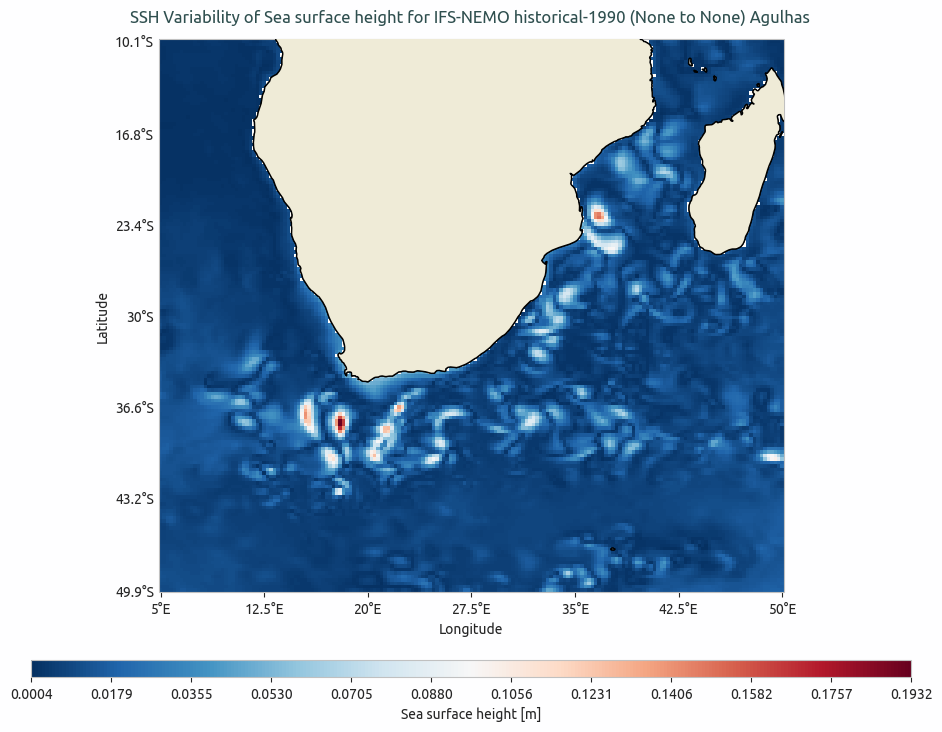

In [10]:
plot_class.plot(dataset_std=ssh_dataset.data_std, **sub_region_dataset)

2025-10-08 18:05:01 :: PlotSshvariability :: ERROR    -> Please specify the time period of the data


(<Figure size 1100x850 with 2 Axes>,
 <GeoAxes: title={'center': 'SSH Variability of Sea surface height for AVISO ssh-L4 (None to None) Agulhas '}, xlabel='Longitude', ylabel='Latitude'>)

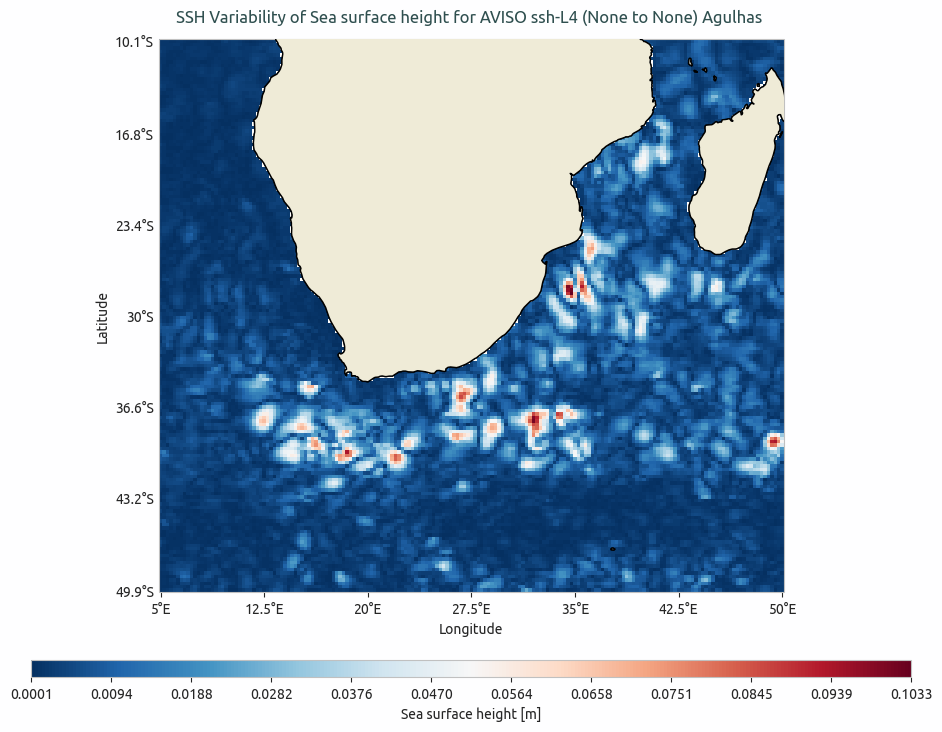

In [11]:
sub_region_dataset_ref = {"catalog": "obs", "model": "AVISO", "exp":"ssh-L4", 'region': 'Agulhas', 'lon_limits': [5, 50], 'lat_limits': [-10, -50], 'proj': 'plate_carree', 'proj_params': {}}
plot_class.plot(dataset_std=ssh_dataset_ref.data_std, **sub_region_dataset_ref)

In [12]:
global_dataset = {"catalog": "climatedt-phase1", "model": "IFS-NEMO", "exp":"historical-1990"}

2025-10-08 18:06:49 :: PlotSshvariability :: ERROR    -> Please specify the time period of the data


(<Figure size 1100x850 with 2 Axes>,
 <GeoAxes: title={'center': 'SSH Variability of Sea surface height for IFS-NEMO historical-1990 (None to None) '}, xlabel='Longitude', ylabel='Latitude'>)

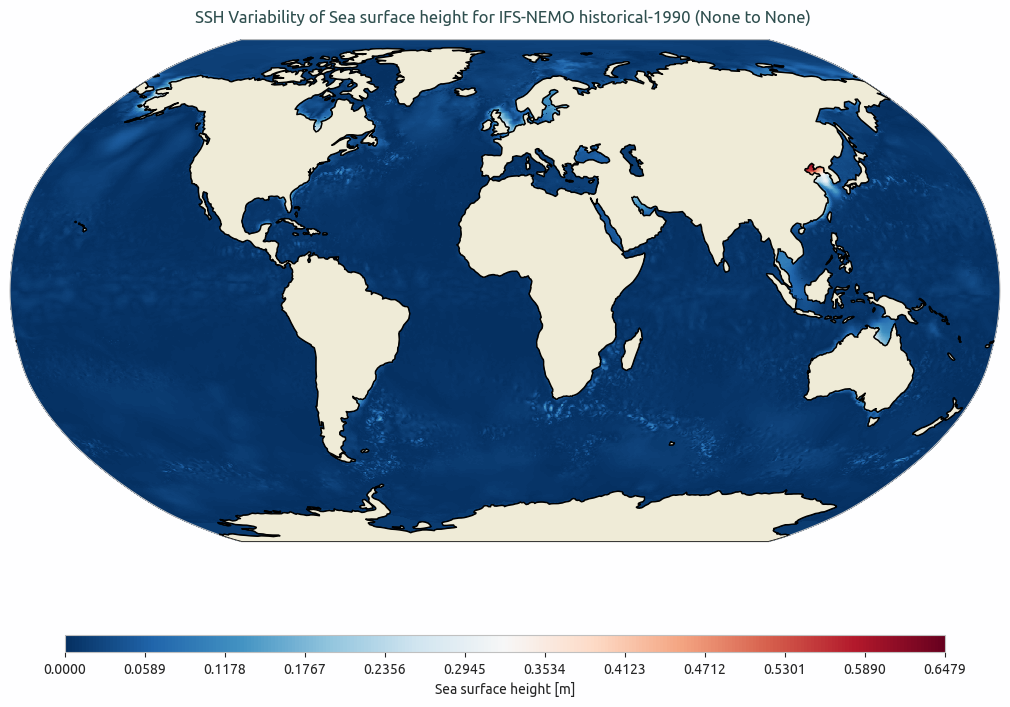

In [13]:
plot_class.plot(dataset_std=ssh_dataset.data_std, **global_dataset)